# EDA on Data Science Job Salaries Dataset

![image](https://storage.googleapis.com/kaggle-datasets-images/2268489/3806098/4a3ac5daca0a8182dd06b54cc75c822a/dataset-cover.png?t=2022-06-15-09-05-09)

## About the Dataset

The [Data Science Job Salaries Dataset](https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries) contains 11 features:

* **work_year:** The year the salary was paid.
* **experience_level:** The experience level in the job during the year with the following possible values: EN Entry-level / Junior MI Mid-level / Intermediate SE Senior-level / Expert EX Executive-level / Director.
* **employment_type:** The type of employement for the role: PT Part-time FT Full-time CT Contract FL Freelance.
* **job_title:** The role worked in during the year.
* **salary:** The total gross salary amount paid.
* **salary_currency:** The currency of the salary paid as an ISO 4217 currency code.
* **salary_in_usd:** The salary in USD (FX rate divided by avg. USD rate for the respective year via fxdata.foorilla.com).
* **employee_residence:** Employee's primary country of residence in during the work year as an ISO 3166 country code.
* **remote_ratio:** The overall amount of work done remotely, possible values are as follows: 0 No remote work (less than 20%) 50 Partially remote 100 Fully remote (more than 80%).
* **company_location:** The country of the employer's main office or contracting branch as an ISO 3166 country code.
* **company_size:** The average number of people that worked for the company during the year: S less than 50 employees (small) M 50 to 250 employees (medium) L more than 250 employees (large).

## Navigation

* [1. Required Libraries and Dataset Loading](#1)
* [2. Univariate Analysis](#2)
    - [2.1. Categorical Features](#2_1_)
    - [2.2. Numerical Features](#2_2_)
* [3. Multivariate Analysis](#3)

<a id="1"></a>
## 1. Required Libraries and Dataset Loading

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pycountry
from wordcloud import WordCloud
import multidict as multidict

sns.set_theme(style="dark")
plt.style.use('seaborn-dark-palette')

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 250)
pd.set_option("display.precision", 3)
pd.set_option("expand_frame_repr", False)

df = pd.read_csv("ds_salaries.csv", index_col=0)
df.drop(["salary", "salary_currency"], axis=1, inplace=True)
df.drop_duplicates(inplace=True)

In [2]:
print(f"Infos:\n{df.info()}\n")
df.head(3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 606
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           565 non-null    int64 
 1   experience_level    565 non-null    object
 2   employment_type     565 non-null    object
 3   job_title           565 non-null    object
 4   salary_in_usd       565 non-null    int64 
 5   employee_residence  565 non-null    object
 6   remote_ratio        565 non-null    int64 
 7   company_location    565 non-null    object
 8   company_size        565 non-null    object
dtypes: int64(3), object(6)
memory usage: 44.1+ KB
Infos:
None



,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,109024,GB,50,GB,M


In [3]:
def check_features(df):
    for col in df.columns.values:
        print(f"{col}:")
        if pd.api.types.is_numeric_dtype(df[col]) and df[col].nunique() > 20:
            print(f"[{df[col].min()}, ..., {df[col].max()}]")
        else:
            print(df[col].unique())
        print("\n")

check_features(df)

work_year:
[2020 2021 2022]


experience_level:
['MI' 'SE' 'EN' 'EX']


employment_type:
['FT' 'CT' 'PT' 'FL']


job_title:
['Data Scientist' 'Machine Learning Scientist' 'Big Data Engineer'
 'Product Data Analyst' 'Machine Learning Engineer' 'Data Analyst'
 'Lead Data Scientist' 'Business Data Analyst' 'Lead Data Engineer'
 'Lead Data Analyst' 'Data Engineer' 'Data Science Consultant'
 'BI Data Analyst' 'Director of Data Science' 'Research Scientist'
 'Machine Learning Manager' 'Data Engineering Manager'
 'Machine Learning Infrastructure Engineer' 'ML Engineer' 'AI Scientist'
 'Computer Vision Engineer' 'Principal Data Scientist'
 'Data Science Manager' 'Head of Data' '3D Computer Vision Researcher'
 'Data Analytics Engineer' 'Applied Data Scientist'
 'Marketing Data Analyst' 'Cloud Data Engineer' 'Financial Data Analyst'
 'Computer Vision Software Engineer' 'Director of Data Engineering'
 'Data Science Engineer' 'Principal Data Engineer'
 'Machine Learning Developer' 'Applied Machine

As seen above, there's **no missing values** on the dataset.

<a id="2"></a>
## 2. Univariate Analysis

In this section we will explore the dataset features uniquely. The goal here is to understand the features values and its distributions.

Despite the fact that **work_year** and **remote_ratio** columns presents numerical values, they must be treated as categorical features.

<a id="2_1_"></a>
### 2.1. Categorical Features

**work_year**

In [4]:
df["work_year"].value_counts(normalize=True).sort_index(ascending=True)

2020    0.127
2021    0.381
2022    0.492
Name: work_year, dtype: float64

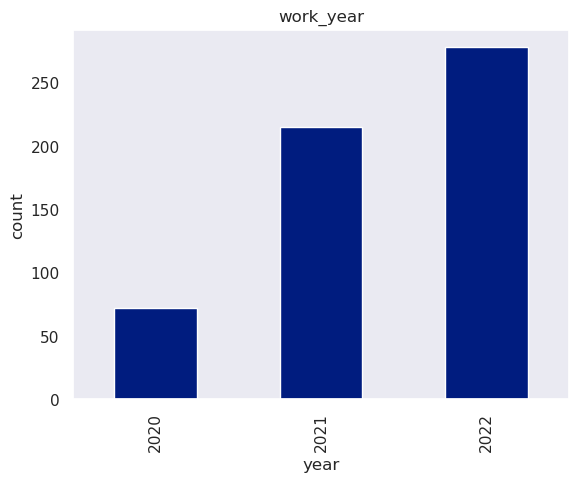

In [5]:
df["work_year"].value_counts().sort_index().plot(
    title="work_year",
    kind="bar",
    xlabel="year",
    ylabel="count",
    
)
plt.show()

As we can see, more than 50% of the data refer to the year 2022.

**experience_level**

* EN: Entry-level / Junior
* MI: Mid-level / Intermediate
* SE: Senior-level / Expert
* EX: Executive-level / Director

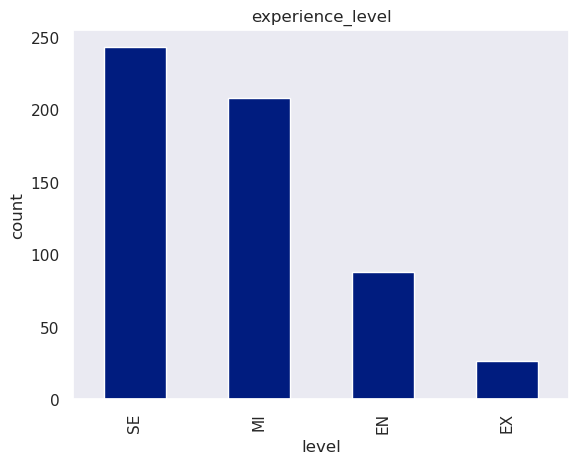

In [6]:
df["experience_level"].value_counts().plot(
    title="experience_level",
    kind="bar",
    xlabel="level",
    ylabel="count",
    
)
plt.show()

**employment_type**

* PT: Part-time
* FT: Full-time
* CT: Contract
* FL: Freelance

In [7]:
df["employment_type"].value_counts(normalize=True)

FT    0.966
PT    0.018
CT    0.009
FL    0.007
Name: employment_type, dtype: float64

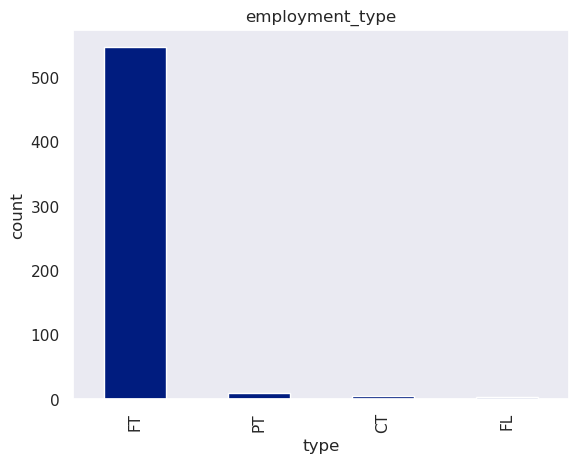

In [8]:
df["employment_type"].value_counts().plot(
    title="employment_type",
    kind="bar",
    xlabel="type",
    ylabel="count"
)
plt.show()

**job_title**

In [9]:
df["job_title"].nunique()

50

There are a lot of different job titles in the dataset, so we will visualize the values with a WordCloud image.

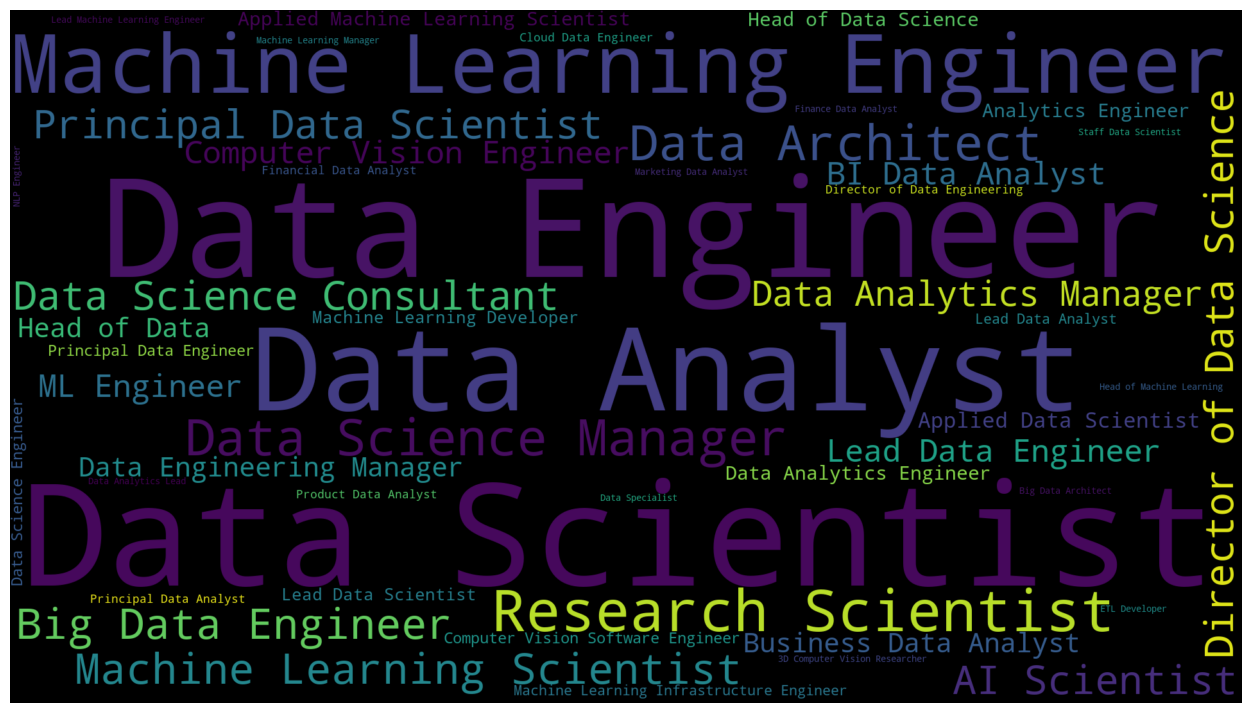

In [10]:
freq_dict = multidict.MultiDict()
for key, val in df["job_title"].value_counts().items():
    freq_dict.add(key, val)

wordcloud = WordCloud(width=1920, height=1080).generate_from_frequencies(freq_dict)
plt.figure(figsize=(16, 9))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Looking at the WordCloud we can see that the job titles Data Scientist, Data Engineer and Data Analyst are the most frequent ones.

In [11]:
df["job_title"].value_counts().sort_values(ascending=False).to_frame(name="frequency").iloc[:5,:]

,frequency
Data Scientist,130
Data Engineer,121
Data Analyst,82
Machine Learning Engineer,39
Research Scientist,16


**employee_residence**

Let's convert the values so we can use it with choropleth:

In [12]:
df["employee_residence"] = df["employee_residence"].map(lambda x : pycountry.countries.get(alpha_2=x).alpha_3)

In [13]:
residence = df["employee_residence"].value_counts()

fig = px.choropleth(
    locations=residence.index,
    color=residence.values,
    color_continuous_scale=px.colors.sequential.algae,
    title="Employee Residence Location"
)

fig.show()

**remote_ratio**

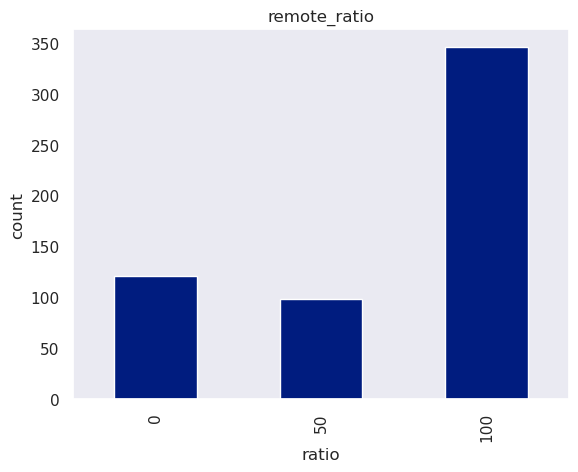

In [14]:
df["remote_ratio"].value_counts().sort_index().plot(
    title="remote_ratio",
    kind="bar",
    xlabel="ratio",
    ylabel="count"
)
plt.show()

In [15]:
df["remote_ratio"].value_counts().sort_index()

0      121
50      98
100    346
Name: remote_ratio, dtype: int64

Most of the jobs included in the dataset are fully remote.

**company_location**

Let's do the same convertion we made in the _employee_residence_ column.

In [16]:
df["company_location"] = df["company_location"].map(lambda x : pycountry.countries.get(alpha_2=x).alpha_3)

In [17]:
locations = df["company_location"].value_counts()

fig = px.choropleth(
    locations=locations.index,
    color=locations.values,
    color_continuous_scale=px.colors.sequential.algae,
    title="Company Location Map"
)
fig.show()

**company_size**

[]

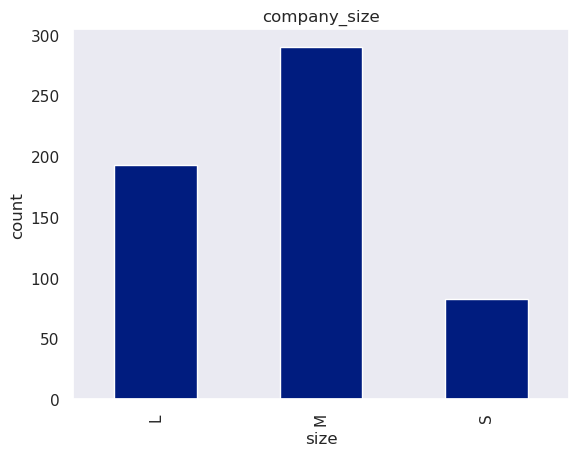

In [18]:
df["company_size"].value_counts().sort_index().plot(
    title="company_size",
    kind="bar",
    xlabel="size",
    ylabel="count"
)
plt.plot()

**company_size** mostly consists of **medium size** companies, followed by **large size**.

<a id="2_2_"></a>
### 2.2. Numerical Features

**salary_in_usd**

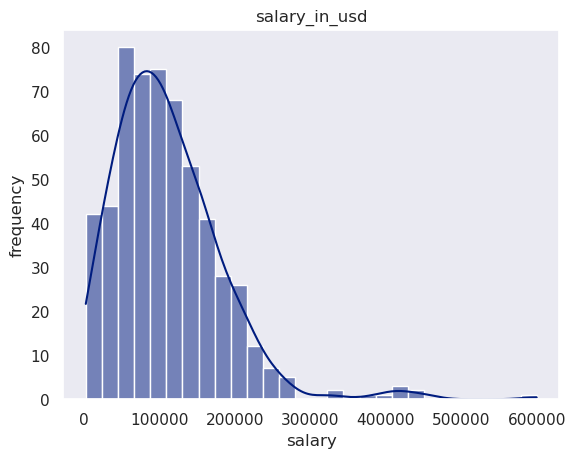

In [19]:
plt.title("salary_in_usd")
sns.histplot(df["salary_in_usd"], kde=True)
plt.xlabel("salary")
plt.ylabel("frequency")
plt.show()

The majority of salaries ranges between 70k and 150k, as we can see above.

<a id="3"></a>
## 3. Multivariate Analysis

In this section we will explore the joint behavior of variables, so we can get some insight about them.

<a id="3_1_"></a>
### 3.1. Mean Salary By Work Year

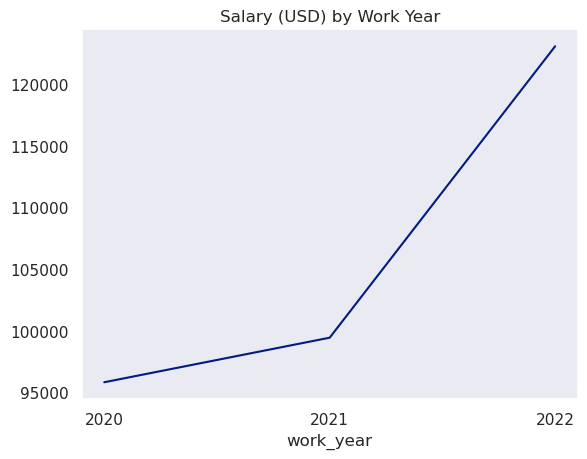

In [43]:
values = df.groupby("work_year")["salary_in_usd"].mean()
values.plot(
    title="Salary (USD) by Work Year",
    kind="line",
    xticks=values.index.values
)
plt.show()

We observed a possible growth of the average salary from the year 2020 to 2022.

<a id="3_2_"></a>
### 3.2. Remote Ratio by Work Year

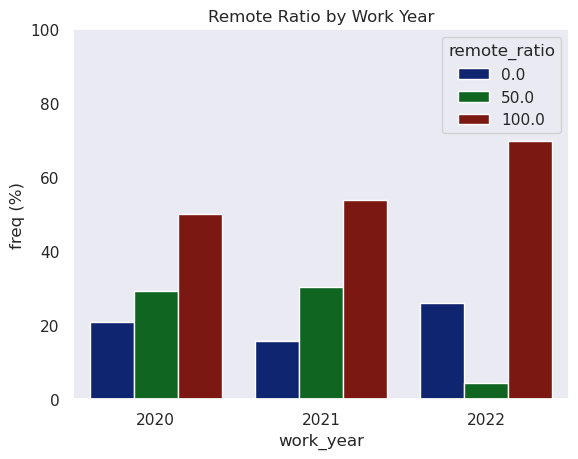

In [84]:
def calc_freqs(x):
    total = values.loc[values["work_year"] == x["work_year"], "count"].sum()
    x["freq"] = (x["count"] / total) * 100
    return x

values = df.groupby(["work_year", "remote_ratio"])["remote_ratio"].count()
values = values.to_frame(name="count").reset_index()
values["freq"] = np.zeros(len(values)).reshape(-1,1)
values = values.apply(
    calc_freqs,
    axis=1
)

plt.title("Remote Ratio by Work Year")
sns.barplot(
    x=values["work_year"].astype(int),
    y=values["freq"],
    hue=values["remote_ratio"],
)
plt.ylim(0, 100)
plt.ylabel("freq (%)")
plt.show()

We can observe a **growth of fully remote jobs** ratio over the years, possibly caused by the **pandemic**.